<img src="https://s2.glbimg.com/Bu6upvmSg6SRv0za635uXphThKo=/620x430/e.glbimg.com/og/ed/f/original/2020/03/28/mercado-livre.jpg" width=30%/>

# Data Science Challenge - Data & Analytics Team
## 1. Explorar las ofertas relámpago, ¿qué insights puedes generar?

### Descripción

En conjunto con el desafío te compartimos un archivo llamado ofertas_relampago.csv el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado. Estas ofertas en mercadolibre se pueden ver de la siguiente manera...

Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.

El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.

Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier duda.

## Entregable
El entregable de este desafío es una Jupyter notebook con el EDA.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Salvando dataset na variável rel
rel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MELI/ofertas_relampago.csv')

In [ ]:
rel.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [ ]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

Apenas as features de data estão como object, vamos splitar para pegar o mês, dia e horário.

In [ ]:
for i in rel:
  print(rel[i].value_counts())
  print("----" * 30)

2021-07-30    1300
2021-07-29    1299
2021-07-08    1267
2021-07-31    1228
2021-07-28    1214
              ... 
2021-06-07     426
2021-06-06     412
2021-06-09     366
2021-06-08     317
2021-06-30     254
Name: OFFER_START_DATE, Length: 61, dtype: int64
------------------------------------------------------------------------------------------------------------------------
2021-07-30 13:00:00+00:00    414
2021-07-29 13:00:00+00:00    411
2021-07-28 13:00:00+00:00    387
2021-07-31 13:00:00+00:00    373
2021-07-27 13:00:00+00:00    363
                            ... 
2021-06-12 18:00:00+00:00      1
2021-07-15 18:00:00+00:00      1
2021-07-15 03:00:00+00:00      1
2021-07-17 22:00:00+00:00      1
2021-07-04 20:00:00+00:00      1
Name: OFFER_START_DTTM, Length: 783, dtype: int64
------------------------------------------------------------------------------------------------------------------------
2021-07-06 13:00:01+00:00    77
2021-07-08 19:00:01+00:00    75
2021-07-23 19:00:02+00:

Não temos valores com gramática errada nas features categóricas.

In [ ]:
rel.isnull().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

Como os valores nulos são relacionados apenas à quantidade de vendas (não venderem), não vou usar médias ou algo do tipo para inserir. Origin provavelmente deve ser a mesma para todas.

In [ ]:
rel.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


Temos itens que ficaram com estoque negativo em -192, vamos investigar mais para frente.

## Feature Engineering

In [ ]:
# Conversão de features para DTTM
rel['OFFER_START_DATE'] = pd.to_datetime(rel['OFFER_START_DATE'])
rel['OFFER_START_DTTM'] = pd.to_datetime(rel['OFFER_START_DTTM'])
rel['OFFER_FINISH_DTTM'] = pd.to_datetime(rel['OFFER_FINISH_DTTM'])

In [ ]:
# Criação de feature com valor unitário de produto
rel['UNIT_SOLD_PRODUCT_VALUE'] = rel['SOLD_AMOUNT'] / rel['SOLD_QUANTITY']

In [ ]:
# Novas features apenas com valor de hora de início e fim de Offers
rel['OFFER_START_TIME'] = rel['OFFER_START_DTTM'].dt.time
rel['OFFER_FINISH_TIME'] = rel['OFFER_FINISH_DTTM'].dt.time

# Nova feature com a data de término
rel['OFFER_FINISH_DATE'] = rel['OFFER_FINISH_DTTM'].dt.strftime("%Y-%m-%d")


In [ ]:
# Novas features com duração de offers
rel['DURATION'] = rel['OFFER_FINISH_DTTM'] - rel['OFFER_START_DTTM']
rel['DURATION_HOURS'] = (rel['OFFER_FINISH_DTTM'] - rel['OFFER_START_DTTM']).dt.total_seconds() / (60*60)
rel['DURATION_DAYS'] = (rel['OFFER_FINISH_DTTM'] - rel['OFFER_START_DTTM']).dt.total_seconds() / (60*60) / 24

In [ ]:
# Novas features Dia da semana e mês
rel['WEEKDAY_START'] = rel['OFFER_START_DTTM'].dt.day_name()
rel['WEEKDAY_END'] = rel['OFFER_FINISH_DTTM'].dt.day_name()
rel['MONTH'] = rel['OFFER_START_DTTM'].dt.month_name()

In [ ]:
rel

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,UNIT_SOLD_PRODUCT_VALUE,OFFER_START_TIME,OFFER_FINISH_TIME,OFFER_FINISH_DATE,DURATION,DURATION_HOURS,DURATION_DAYS,WEEKDAY_START,WEEKDAY_END,MONTH
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,...,0.786667,16:00:00,23:02:43,2021-06-22,0 days 07:02:43,7.045278,0.293553,Tuesday,Tuesday,June
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,...,NaN,13:00:00,19:00:02,2021-06-22,0 days 06:00:02,6.000556,0.250023,Tuesday,Tuesday,June
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,...,3.576667,07:00:00,13:00:01,2021-06-22,0 days 06:00:01,6.000278,0.250012,Tuesday,Tuesday,June
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,...,3.515000,19:00:00,01:36:12,2021-06-23,0 days 06:36:12,6.603333,0.275139,Tuesday,Wednesday,June
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,...,2.643333,13:00:00,15:48:12,2021-06-22,0 days 02:48:12,2.803333,0.116806,Tuesday,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,...,2.713333,13:00:00,19:00:01,2021-06-19,0 days 06:00:01,6.000278,0.250012,Saturday,Saturday,June
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,...,NaN,13:00:00,19:00:01,2021-06-19,0 days 06:00:01,6.000278,0.250012,Saturday,Saturday,June
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,...,8.310000,07:00:00,13:00:03,2021-06-19,0 days 06:00:03,6.000833,0.250035,Saturday,Saturday,June
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,...,9.697500,13:00:00,19:00:00,2021-06-19,0 days 06:00:00,6.000000,0.250000,Saturday,Saturday,June


In [ ]:
rel.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,UNIT_SOLD_PRODUCT_VALUE,DURATION,DURATION_HOURS,DURATION_DAYS
count,48746.000000,48746.000000,24579.000000,24579.000000,24579.000000,48746,48746.000000,48746.000000
mean,35.007508,30.565216,51.208898,10.851052,8.840607,0 days 05:42:30.039900709,5.708344,0.237848
std,206.761058,195.813806,175.254414,45.475305,22.367321,0 days 02:06:47.146022376,2.113096,0.088046
min,1.000000,-192.000000,0.280000,1.000000,0.121333,0 days 00:00:00,0.000000,0.000000
25%,5.000000,4.000000,5.730000,1.000000,2.365000,0 days 06:00:00,6.000000,0.250000
50%,10.000000,8.000000,12.420000,3.000000,3.994000,0 days 06:00:02,6.000556,0.250023
75%,15.000000,15.000000,30.925000,6.000000,7.670000,0 days 06:00:16,6.004444,0.250185
max,9000.000000,8635.000000,4836.570000,1646.000000,639.070000,4 days 08:45:09,104.752500,4.364687


In [ ]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

In [ ]:
# Dropando colunas antigas de DTTM

rel.drop(columns={'OFFER_START_DTTM','OFFER_FINISH_DTTM'}, inplace=True)

In [ ]:
rel

,OFFER_START_DATE,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,...,UNIT_SOLD_PRODUCT_VALUE,OFFER_START_TIME,OFFER_FINISH_TIME,OFFER_FINISH_DATE,DURATION,DURATION_HOURS,DURATION_DAYS,WEEKDAY_START,WEEKDAY_END,MONTH
0,2021-06-22,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,...,0.786667,16:00:00,23:02:43,2021-06-22,0 days 07:02:43,7.045278,0.293553,Tuesday,Tuesday,June
1,2021-06-22,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,...,NaN,13:00:00,19:00:02,2021-06-22,0 days 06:00:02,6.000556,0.250023,Tuesday,Tuesday,June
2,2021-06-22,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,...,3.576667,07:00:00,13:00:01,2021-06-22,0 days 06:00:01,6.000278,0.250012,Tuesday,Tuesday,June
3,2021-06-22,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,...,3.515000,19:00:00,01:36:12,2021-06-23,0 days 06:36:12,6.603333,0.275139,Tuesday,Wednesday,June
4,2021-06-22,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,...,2.643333,13:00:00,15:48:12,2021-06-22,0 days 02:48:12,2.803333,0.116806,Tuesday,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,...,2.713333,13:00:00,19:00:01,2021-06-19,0 days 06:00:01,6.000278,0.250012,Saturday,Saturday,June
48742,2021-06-19,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,...,NaN,13:00:00,19:00:01,2021-06-19,0 days 06:00:01,6.000278,0.250012,Saturday,Saturday,June
48743,2021-06-19,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,...,8.310000,07:00:00,13:00:03,2021-06-19,0 days 06:00:03,6.000833,0.250035,Saturday,Saturday,June
48744,2021-06-19,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,...,9.697500,13:00:00,19:00:00,2021-06-19,0 days 06:00:00,6.000000,0.250000,Saturday,Saturday,June


In [ ]:
# Convertendo Weekdays para números manualmente, preferi para ter controle

# WEEKDAY_START 
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].str.replace('Sunday','0')
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].str.replace('Monday','1')
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].str.replace('Tuesday','2')
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].str.replace('Wednesday','3')
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].str.replace('Thursday','4')
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].str.replace('Friday','5')
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].str.replace('Saturday','6')

# Convertendo tipo
rel['WEEKDAY_START'] = rel['WEEKDAY_START'].astype(float)

# WEEKDAY_END 
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].str.replace('Sunday','0')
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].str.replace('Monday','1')
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].str.replace('Tuesday','2')
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].str.replace('Wednesday','3')
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].str.replace('Thursday','4')
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].str.replace('Friday','5')
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].str.replace('Saturday','6')

# Convertendo tipo
rel['WEEKDAY_END'] = rel['WEEKDAY_END'].astype(float)

In [ ]:
display(rel['WEEKDAY_START'].value_counts())
display(rel['WEEKDAY_END'].value_counts())

5.0    7773
6.0    7506
2.0    7322
4.0    7286
3.0    6718
1.0    6307
0.0    5834
Name: WEEKDAY_START, dtype: int64

5.0    7824
6.0    7646
2.0    7091
3.0    7055
4.0    6893
0.0    6219
1.0    6018
Name: WEEKDAY_END, dtype: int64

In [ ]:
# Nova feature com quantidade de vendas por hora
rel['SALES_PER_HOUR'] = rel['SOLD_QUANTITY'] / rel['DURATION_HOURS']

## EDA
### O que pretendo descobrir:
1. Receita por mês
2. Receita por dia da semana
3. Insights sobre duração de offers
4. Distribuição e insights entre quantidades de itens com venda e sem venda
4. Produtos/verticais/domainagg/domain id que mais venderam por hora
5. Produtos que mais podem gerar dor de cabeça para o MELI pois venderam além do estoque envolvido
6. Valor médio de produto unitário por vertical
7. Insights sobre impacto de frete grátis
8. Produtos que mais geraram receita, melhor ticket médio e com mais vendas por hora
9. Label encoding e standard scaler para identificar correlação de features

In [ ]:
# Definindo cores da identidade MELI

bar_color = "#ffec01"
bg_color = "#181C3F"
text_color = '#FFFFFF'

### 1. Receita por mês

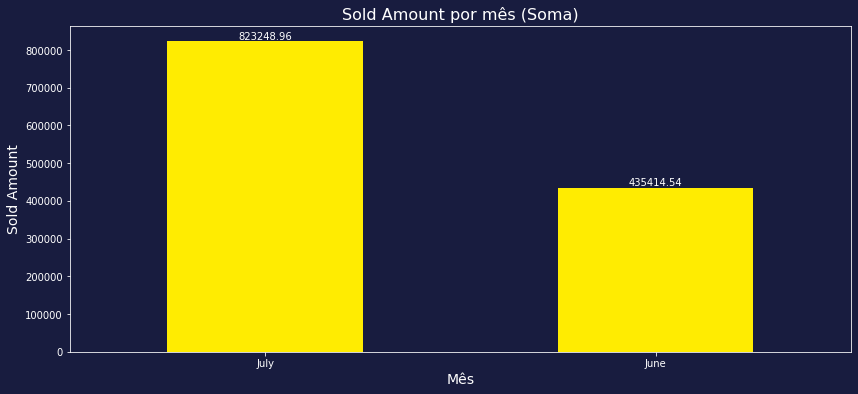

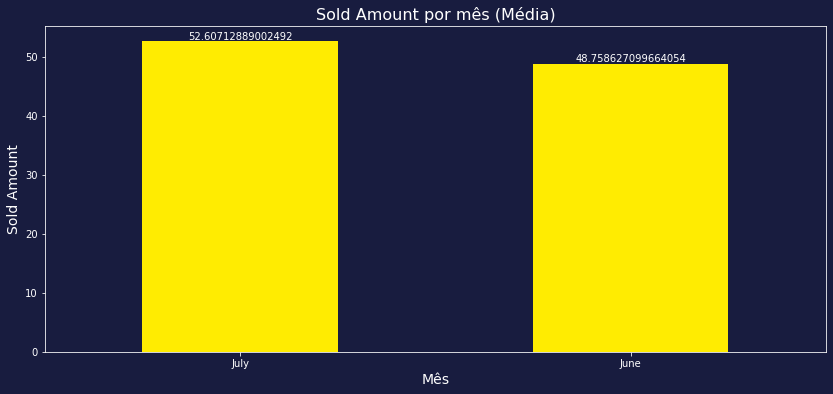

In [ ]:
receita_por_mes = rel.groupby('MONTH')['SOLD_AMOUNT'].sum()

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax = receita_por_mes.plot.bar(color=bar_color)

for i, v in enumerate(receita_por_mes):
    ax.text(i, v, str(v), ha='center', va='bottom', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.title('Sold Amount por mês (Soma)', color=text_color, fontsize=16)
plt.xlabel('Mês', color=text_color, fontsize=14)
plt.ylabel('Sold Amount', color=text_color, fontsize=14)

plt.xticks(rotation=0)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax = receita_por_mes_media.plot.bar(color=bar_color)

for i, v in enumerate(receita_por_mes_media):
    ax.text(i, v, str(v), ha='center', va='bottom', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.title('Sold Amount por mês (Média)', color=text_color, fontsize=16)
plt.xlabel('Mês', color=text_color, fontsize=14)
plt.ylabel('Sold Amount', color=text_color, fontsize=14)

plt.xticks(rotation=0)
plt.show()

**Considerações:** Julho vendeu mais que Junho, porém, o ticket médio das vendas foi semelhante nos dois meses.

### 2. Receita por dia da semana

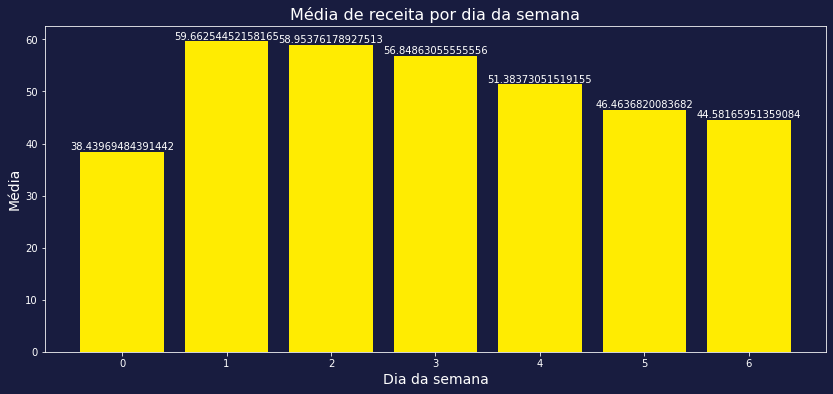

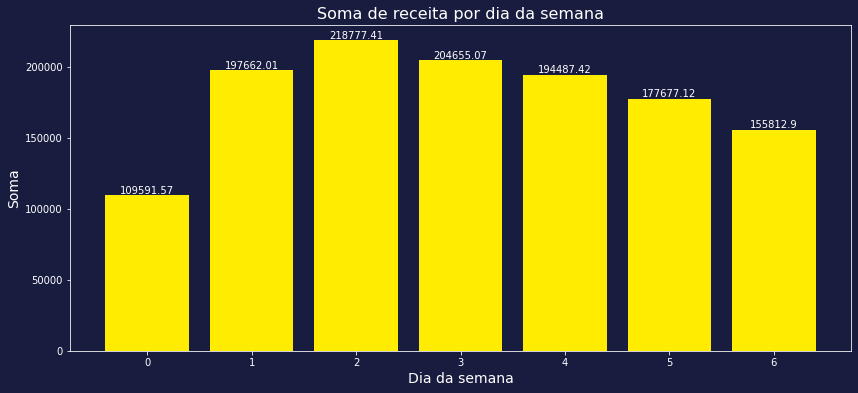

In [ ]:
receita_por_dia_semana = rel.groupby('WEEKDAY_START')['SOLD_AMOUNT'].mean()

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)


bars = ax.bar(receita_por_dia_semana.index, receita_por_dia_semana.values, color=bar_color)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.title('Média de receita por dia da semana', color=text_color, fontsize=16)
plt.xlabel('Dia da semana', color=text_color, fontsize=14)
plt.ylabel('Média', color=text_color, fontsize=14)

plt.show()

print('')

receita_por_dia_semana_soma = rel.groupby('WEEKDAY_START')['SOLD_AMOUNT'].sum()

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

bars = ax.bar(receita_por_dia_semana_soma.index, receita_por_dia_semana_soma.values, color=bar_color)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.title('Soma de receita por dia da semana', color=text_color, fontsize=16)
plt.xlabel('Dia da semana', color=text_color, fontsize=14)
plt.ylabel('Soma', color=text_color, fontsize=14)

plt.show()


**Considerações:** Tanto a soma quanto o ticket médio são parecidos em todos os dias da semana, exceto pela terça-feira (2) que possui ticket médio semelhante à segunda-feira porém com maior receita gerada.

### 3. Quantidade de vendas por hora

In [ ]:
rel['SALES_PER_HOUR_BINS'] = pd.cut(rel['SALES_PER_HOUR'], bins=15)

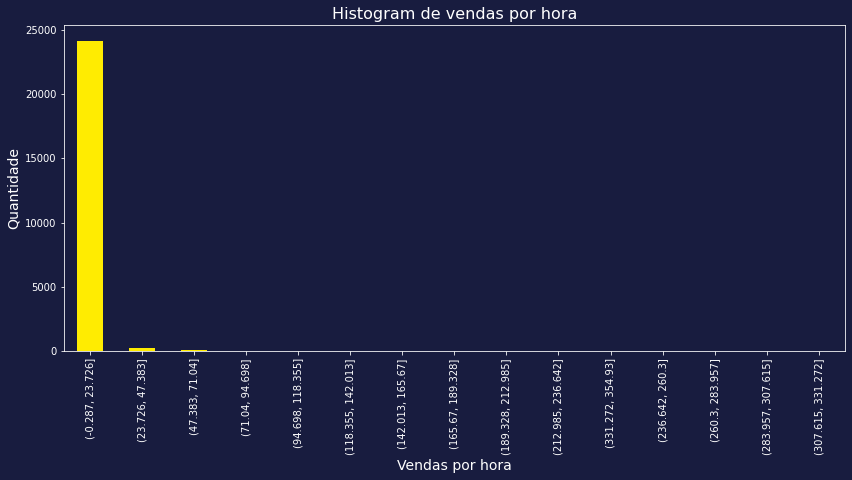

(-0.287, 23.726]      24152
(23.726, 47.383]        276
(47.383, 71.04]          92
(71.04, 94.698]          27
(94.698, 118.355]        14
(118.355, 142.013]        7
(142.013, 165.67]         5
(165.67, 189.328]         2
(189.328, 212.985]        2
(212.985, 236.642]        1
(331.272, 354.93]         1
(236.642, 260.3]          0
(260.3, 283.957]          0
(283.957, 307.615]        0
(307.615, 331.272]        0
Name: SALES_PER_HOUR_BINS, dtype: int64


In [ ]:
vendas_por_hora = rel['SALES_PER_HOUR_BINS'].value_counts()

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)



ax = vendas_por_hora.plot.bar(color=bar_color)

plt.title('Histogram de vendas por hora', color=text_color, fontsize=16)
plt.xlabel('Vendas por hora', color=text_color, fontsize=14)
plt.ylabel('Quantidade', color=text_color, fontsize=14)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.show()


print(vendas_por_hora)

**Considerações:** São realizadas em sua grande maioria, entre 0 e 23 vendas por hora.

### 4. Distribuição e insights entre quantidades de itens com venda e sem venda

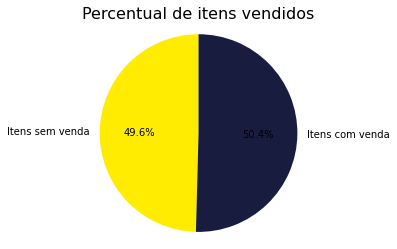

In [ ]:
itens_sem_venda = rel['SOLD_QUANTITY'].isna().sum()
itens_com_venda = rel['SOLD_QUANTITY'].notna().sum()

colors = [bar_color, bg_color]

plt.pie([itens_sem_venda, itens_com_venda], labels=['Itens sem venda', 'Itens com venda'], startangle=90, autopct='%1.1f%%', colors=colors)

plt.title('Percentual de itens vendidos', fontsize=16)

plt.axis('equal')

plt.show()

**Considerações:** Praticamente metade dos produtos do dataset tiveram vendas.

In [ ]:
# Para rodar o atributo bar_label precisamos manter o matplotlib atualizado
# !pip install -U matplotlib

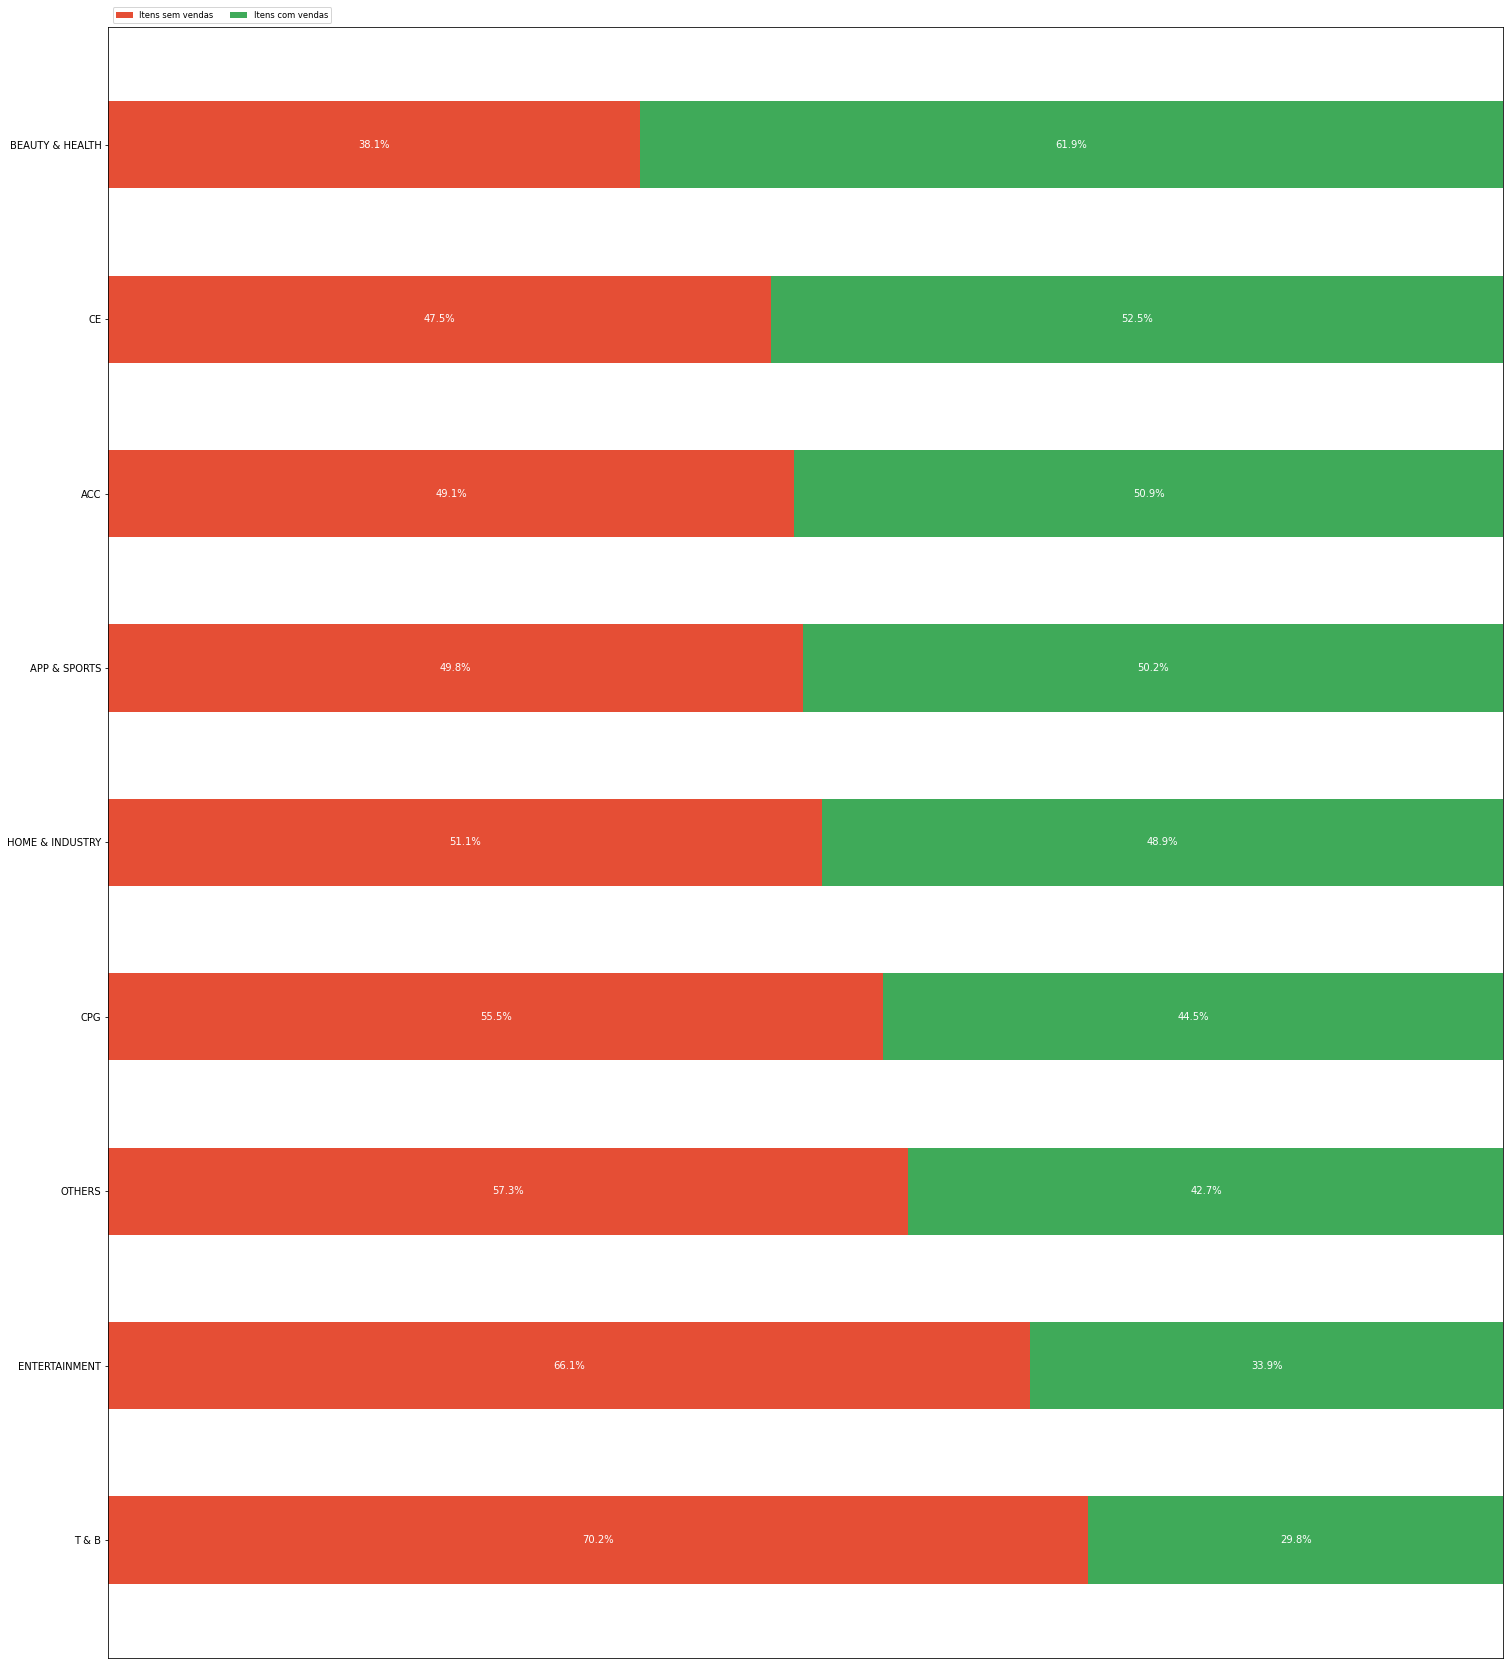

In [ ]:
category_names = ['Itens sem vendas', 'Itens com vendas']

verticals = rel['VERTICAL'].unique()

results = {}
for vertical in verticals:
    com_vendas = rel[(rel['VERTICAL'] == vertical) & (rel['SOLD_QUANTITY'].notna())]['OFFER_START_DATE'].count()
    sem_vendas = rel[(rel['VERTICAL'] == vertical) & (rel['SOLD_QUANTITY'].isna())]['OFFER_START_DATE'].count()
    results[vertical] = [sem_vendas, com_vendas]

def verticais(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    com_vendas_perc = data[:, 1] / np.sum(data, axis=1) * 100
    sorted_indices = np.argsort(com_vendas_perc)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_data = data[sorted_indices, :]

    data_norm = sorted_data / np.sum(sorted_data, axis=1)[:, np.newaxis] * 100
    data_cum = data_norm.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(25, 30))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data_norm[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(sorted_labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, labels=['{:.1f}%'.format(val) for val in widths], label_type='center', color=text_color)

    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    ax.set_xlabel('Porcentagem')
    return fig, ax


verticais(results, category_names)
plt.show()


**Considerações:** Mais da metade dos produtos das categorias HOME & INDUSTRY, CPG, OTHERS, ENTERTAINMENT e T & B não tiveram vendas.

In [ ]:
lista_domain_agg1 = rel['DOM_DOMAIN_AGG1'].unique()
lista_domain_agg1

array(['PETS FOOD', 'PET PRODUCTS', 'COMPUTERS', 'ELECTRONICS', 'APPAREL',
       'PARTY', 'TOYS AND GAMES', 'PERSONAL CARE', 'INDUSTRY',
       'TOOLS AND CONSTRUCTION', 'HOME&DECOR', 'SPORTS',
       'BOOKS, MULTIMEDIA & OTHER E!', 'AUTOPARTS', 'DRINKS', 'FOOTWEAR',
       'WHEELS & TIRES', 'BEAUTY EQUIPMENT', 'MOBILE',
       'APPAREL ACCESORIES', 'FOODS', 'PHARMACEUTICS', 'STATIONARY',
       'BABY', 'PERSONAL HYGIENE', 'OTHER', 'VEHICULAR MULTIMEDIA',
       'SUPLEMENTS', 'SECURITY', 'MOTOPARTS', 'CLEANING', 'ACC TOOLS',
       'MUSICAL INSTRUMENTS', 'ANTIQUES & HOBBIES', 'BATTERIES', 'AGRO'],
      dtype=object)

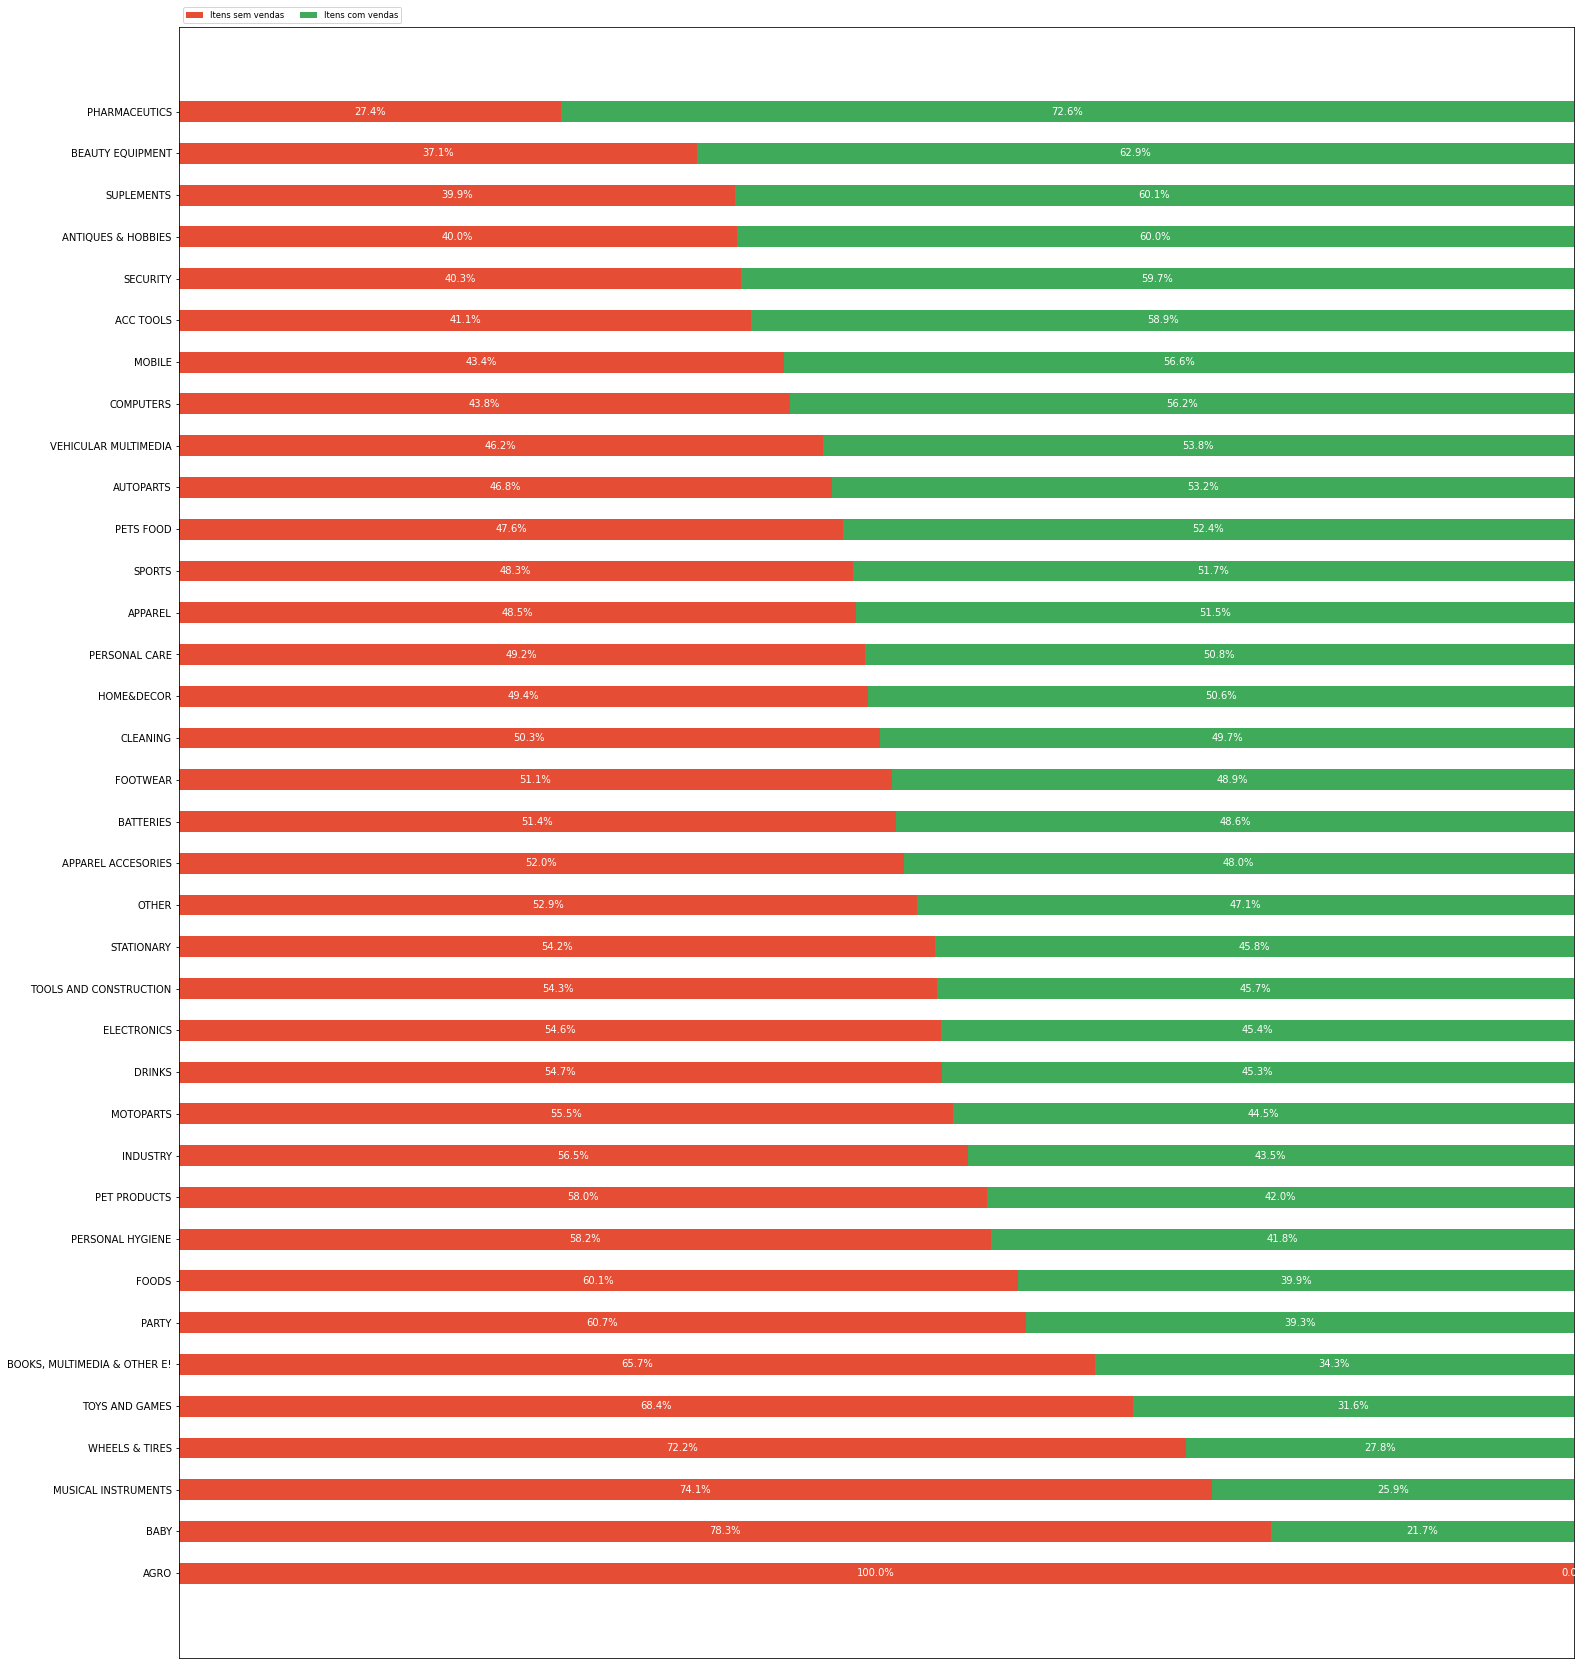

In [ ]:
category_names = ['Itens sem vendas', 'Itens com vendas']

dom_agg1 = lista_domain_agg1

results = {}

for domain in dom_agg1:
    com_vendas = rel[(rel['DOM_DOMAIN_AGG1'] == domain) & (rel['SOLD_QUANTITY'].notna())]['OFFER_START_DATE'].count()
    sem_vendas = rel[(rel['DOM_DOMAIN_AGG1'] == domain) & (rel['SOLD_QUANTITY'].isna())]['OFFER_START_DATE'].count()
    results[domain] = [sem_vendas, com_vendas]

verticais(results, category_names)
plt.show()


**Considerações:** Existe um grande número de produtos das categorias dentro de DOM_DOMAIN_AGG1 que mais da metade não é vendido. Porém, os mais preocupantes são (em ordem de importância):
1. AGRO (Nada foi vendido)
2. BABY
3. MUSICAL INSTRUMENTS
4. WHEELS & TIRES

### 5. Produtos que mais podem gerar dor de cabeça para o MELI pois venderam além do estoque envolvido

In [ ]:
rel['SHIPPING_PAYMENT_TYPE'] = rel['SHIPPING_PAYMENT_TYPE'].str.replace('free_shipping','1')
rel['SHIPPING_PAYMENT_TYPE'] = rel['SHIPPING_PAYMENT_TYPE'].str.replace('none','0')
rel['SHIPPING_PAYMENT_TYPE'] = rel['SHIPPING_PAYMENT_TYPE'].fillna('0')
rel['SHIPPING_PAYMENT_TYPE'] = rel['SHIPPING_PAYMENT_TYPE'].astype(int)

In [ ]:
estoque_negativo = rel[rel['REMAINING_STOCK_AFTER_END'] < 0]
estoque_negativo_group = estoque_negativo.groupby(['VERTICAL','DOM_DOMAIN_AGG1','DOMAIN_ID'])[['REMAINING_STOCK_AFTER_END']].mean().sort_values(by='REMAINING_STOCK_AFTER_END', ascending=True)
display(estoque_negativo_group.head(20))

,,,REMAINING_STOCK_AFTER_END
VERTICAL,DOM_DOMAIN_AGG1,DOMAIN_ID,
APP & SPORTS,SPORTS,MLM-THERMAL_CUPS_AND_TUMBLERS,-32.000000
BEAUTY & HEALTH,BEAUTY EQUIPMENT,MLM-DISPOSABLE_GLOVES,-13.111111
T & B,TOYS AND GAMES,MLM-TOYS_AND_GAMES,-12.857143
CPG,CLEANING,MLM-KITCHEN_PAPER_TOWELS,-10.000000
BEAUTY & HEALTH,PHARMACEUTICS,MLM-NASAL_CPAP_MASKS,-10.000000
CE,COMPUTERS,MLM-HEADPHONES,-7.571429
APP & SPORTS,APPAREL,MLM-SHIRTS,-7.500000
CE,MOBILE,MLM-CELLPHONE_ACCESSORIES,-7.250000
APP & SPORTS,SPORTS,MLM-FLASHLIGHTS,-6.083333


**Considerações:** Os produtos de DOMAIN_ID que podem gerar mais "dor de cabeça" para os vendedores e eventualmente MELI estão listados acima. 

Top 3 produtos que venderam além do estoque:


1.   MLM-THERMAL_CUPS_AND_TUMBLERS	
2.   MLM-DISPOSABLE_GLOVES	
3. MLM-TOYS_AND_GAMES	





### 6. Valor médio de produto unitário por vertical

In [ ]:
display(rel.groupby('VERTICAL')[['UNIT_SOLD_PRODUCT_VALUE','SALES_PER_HOUR']].mean().sort_values(by='UNIT_SOLD_PRODUCT_VALUE', ascending=False))
display(rel.groupby('DOM_DOMAIN_AGG1')[['UNIT_SOLD_PRODUCT_VALUE','SALES_PER_HOUR']].mean().sort_values(by='UNIT_SOLD_PRODUCT_VALUE', ascending=False))
display(rel.groupby('DOMAIN_ID')[['UNIT_SOLD_PRODUCT_VALUE','SALES_PER_HOUR']].mean().sort_values(by='UNIT_SOLD_PRODUCT_VALUE', ascending=False))
display(rel.groupby('DOMAIN_ID')[['UNIT_SOLD_PRODUCT_VALUE','SALES_PER_HOUR']].mean().sort_values(by='SALES_PER_HOUR', ascending=False))

,UNIT_SOLD_PRODUCT_VALUE,SALES_PER_HOUR
VERTICAL,,
CE,19.492226,1.133426
T & B,9.012248,0.825843
HOME & INDUSTRY,7.267814,1.136736
OTHERS,7.157331,0.552354
ACC,6.652271,1.019667
APP & SPORTS,6.097740,0.895715
BEAUTY & HEALTH,6.044484,6.939349
ENTERTAINMENT,5.834801,0.357120
CPG,4.120839,1.360674


,UNIT_SOLD_PRODUCT_VALUE,SALES_PER_HOUR
DOM_DOMAIN_AGG1,,
WHEELS & TIRES,34.843350,0.552565
ELECTRONICS,25.866956,0.779209
MOBILE,24.046720,1.075419
ANTIQUES & HOBBIES,15.678333,0.555412
VEHICULAR MULTIMEDIA,14.057691,0.970723
BABY,14.042760,0.354125
MUSICAL INSTRUMENTS,13.349667,0.496704
COMPUTERS,13.131137,1.390918
INDUSTRY,11.261136,1.171245


,UNIT_SOLD_PRODUCT_VALUE,SALES_PER_HOUR
DOMAIN_ID,,
MLM-WASHING_MACHINES,298.850000,0.124983
MLM-LIVING_ROOM_SETS,255.720000,0.125000
MLM-NOTEBOOKS,228.152202,0.242550
MLM-ALL_IN_ONE,172.329667,0.333315
MLM-DESKTOP_COMPUTERS,168.583667,0.224966
...,...,...
MLM-WELDING_CHIPPING_HAMMERS,NaN,NaN
MLM-WHEEL_HUBS,NaN,NaN
MLM-WINE_AERATORS,NaN,NaN


,UNIT_SOLD_PRODUCT_VALUE,SALES_PER_HOUR
DOMAIN_ID,,
MLM-CAMERA_STRAPS,2.067500,23.548651
MLM-THERMAL_CUPS_AND_TUMBLERS,5.630293,22.088307
MLM-DISPOSABLE_GLOVES,5.222974,17.464576
MLM-CARD_PAYMENT_TERMINALS,18.492050,15.285794
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,5.133078,15.234566
...,...,...
MLM-WELDING_CHIPPING_HAMMERS,NaN,NaN
MLM-WHEEL_HUBS,NaN,NaN
MLM-WINE_AERATORS,NaN,NaN


**Considerações:** Em quatro filtros simples conseguimos ter vários insights:


1.   Produtos da vertical CE possuem maior ticket médio (19,49);
2.   Produtos da vertical BEAUTY & HEALTH	vendem mais rápido por hora (6,93);
3.   Produtos do DOM_DOMAIN_AGG1 WHEELS & TIRES possuem maior ticket médio (34,84);
4.   Produtos do DOM_DOMAIN_AGG1 PHARMACEUTICS vendem mais rápido por hora (11,38);
4.   Produtos do DOMAIN_ID MLM-WASHING_MACHINES	 possuem maior ticket médio (298,85);
5.   Produtos do DOMAIN_ID MLM-CAMERA_STRAPS vendem mais rápido por hora (23,54).




### 7. Insights sobre impacto de frete grátis

In [ ]:
frete_vertical = rel.groupby(['VERTICAL', 'SHIPPING_PAYMENT_TYPE'])[['SOLD_AMOUNT']].sum().sort_values(by='SOLD_AMOUNT', ascending=False)
display(frete_vertical)

frete_d1 = rel.groupby(['DOM_DOMAIN_AGG1', 'SHIPPING_PAYMENT_TYPE'])[['SOLD_AMOUNT']].sum().sort_values(by='SOLD_AMOUNT', ascending=False)
display(frete_d1)

frete_did = rel.groupby(['DOMAIN_ID', 'SHIPPING_PAYMENT_TYPE'])[['SOLD_AMOUNT']].sum().sort_values(by='SOLD_AMOUNT', ascending=False)
display(frete_did)

,,SOLD_AMOUNT
VERTICAL,SHIPPING_PAYMENT_TYPE,
BEAUTY & HEALTH,0,381550.09
CE,1,336708.99
BEAUTY & HEALTH,1,165877.18
HOME & INDUSTRY,1,109692.66
APP & SPORTS,1,93485.61
HOME & INDUSTRY,0,45826.02
APP & SPORTS,0,37615.75
CE,0,26078.95
ACC,1,18989.99


SOLD_AMOUNT
DOM_DOMAIN_AGG1      SHIPPING_PAYMENT_TYPE             
PHARMACEUTICS        0                        298027.61
MOBILE               1                        155603.05
PHARMACEUTICS        1                        142189.13
ELECTRONICS          1                        116057.50
BEAUTY EQUIPMENT     0                         74584.27
...                                                 ...
OTHER                0                            72.82
                     1                            63.93
VEHICULAR MULTIMEDIA 0                            54.27
BATTERIES            1                            40.96
AGRO                 1                             0.00

[68 rows x 1 columns]

SOLD_AMOUNT
DOMAIN_ID                         SHIPPING_PAYMENT_TYPE             
MLM-SURGICAL_AND_INDUSTRIAL_MASKS 0                        289104.14
                                  1                        121259.16
MLM-CELLPHONES                    1                        111678.79
MLM-TELEVISIONS                   1                         66366.08
MLM-DISPOSABLE_GLOVES             0                         54019.46
...                                                              ...
MLM-OFFICE_EQUIPMENT              1                             0.00
MLM-CHOPSTICKS                    0                             0.00
MLM-CHOCOLATE_WATERFALLS          1                             0.00
MLM-ORAL_IRRIGATORS               1                             0.00
MLM-3D_PENS                       1                             0.00

[1745 rows x 1 columns]

**Considerações:** A receita gerada comparada com as categorias (0 = usuário pagou frete, 1 = usuário não pagou frete) mostra grande diferença na geração de receita. Algumas os usuários pagam o frete e tem grande volume de SOLD_AMOUNT como a Vertical **BEAUTY & HEALTH**, DOMAIN_ID MLM-**SURGICAL_AND_INDUSTRIAL_MASKS** (muito por conta da pandemia do COVID-19) e DOM_DOMAIN_AGG1 **PHARMECEUTICS** onde as pessoas não se preocupariam em pagar pelo frete pois tem senso de urgência

Beleza e saúde, ao contrário de outros mercados, foi um dos únicos que cresceu nesse período no Brasil, conforme indicado [nesse estudo](https://www.ecommercebrasil.com.br/artigos/e-commerce-na-pandemia-segmento-de-saude-e-beleza?view=v2).

### 8. Produtos que mais geraram receita, melhor ticket médio e com mais vendas por hora

In [ ]:
print('Soma de SOLD_AMOUNT por DOMAIN_ID:')
display(rel.groupby(['DOMAIN_ID'])[['SOLD_AMOUNT']].sum().sort_values(by='SOLD_AMOUNT', ascending=False))
print('Média de UNIT_SOLD_PRODUCT_VALUE por DOMAIN_ID:')
display(rel.groupby(['DOMAIN_ID'])[['UNIT_SOLD_PRODUCT_VALUE']].mean().sort_values(by='UNIT_SOLD_PRODUCT_VALUE',ascending=False))
print('Soma de SALES_PER_HOUR por DOMAIN_ID:')
display(rel.groupby(['DOMAIN_ID'])[['SALES_PER_HOUR']].sum().sort_values(by='SALES_PER_HOUR',ascending=False))

Soma de SOLD_AMOUNT por DOMAIN_ID:


,SOLD_AMOUNT
DOMAIN_ID,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,410363.30
MLM-CELLPHONES,111678.79
MLM-TELEVISIONS,66366.08
MLM-DISPOSABLE_GLOVES,55365.39
MLM-HEADPHONES,29628.06
...,...
MLM-MOTORCYCLE_TRANSMISSION_KITS,0.00
MLM-CHOCOLATE_WATERFALLS,0.00
MLM-MOTORCYCLE_GOGGLES,0.00


Média de UNIT_SOLD_PRODUCT_VALUE por DOMAIN_ID:


,UNIT_SOLD_PRODUCT_VALUE
DOMAIN_ID,
MLM-WASHING_MACHINES,298.850000
MLM-LIVING_ROOM_SETS,255.720000
MLM-NOTEBOOKS,228.152202
MLM-ALL_IN_ONE,172.329667
MLM-DESKTOP_COMPUTERS,168.583667
...,...
MLM-WELDING_CHIPPING_HAMMERS,NaN
MLM-WHEEL_HUBS,NaN
MLM-WINE_AERATORS,NaN


Soma de SALES_PER_HOUR por DOMAIN_ID:


,SALES_PER_HOUR
DOMAIN_ID,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,23963.972170
MLM-DISPOSABLE_GLOVES,2584.757291
MLM-HEADPHONES,1308.179097
MLM-OXIMETERS,1225.632058
MLM-THERMOSES,1009.884380
...,...
MLM-CAR_BODY_SCOOPS,0.000000
MLM-MICROSCOPES,0.000000
MLM-MICROBLADING_PIGMENTS,0.000000


**Considerações:** Observando o nível mais granular de categorias (DOMAIN_ID), conseguimos identificar que a pandemia realmente causou grande impacto.

Máscaras cirúrgicas e industriais lideraram a quantidade de receita gerada (SOLD_AMOUNT) e de vendas por hora.

Máquinas de lavar, livin_room_sets, notebooks e computadores lideraram o ticket



### 9. Label encoding e standard scaler para identificar correlação de features

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cópia de dataframe apenas para essa análise
df_encoding = rel.copy()

cat_cols = df_encoding.select_dtypes(include=['object']).columns.tolist()

encoders = {}

# Encoding de features object
for col in cat_cols:
    encoder = LabelEncoder()
    df_encoding[col] = encoder.fit_transform(df_encoding[col])
    encoders[col] = encoder

num_cols = df_encoding.select_dtypes(include=['float', 'int']).columns.tolist()

# Standard scaler no dataset
scaler = StandardScaler()
df_encoding[num_cols] = scaler.fit_transform(df_encoding[num_cols])

In [ ]:
df_encoding

,OFFER_START_DATE,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,...,OFFER_FINISH_TIME,OFFER_FINISH_DATE,DURATION,DURATION_HOURS,DURATION_DAYS,WEEKDAY_START,WEEKDAY_END,MONTH,SALES_PER_HOUR,SALES_PER_HOUR_BINS
0,2021-06-22,0.0,-0.149969,-0.166309,-0.265271,-0.106677,-1.81871,-1.098590,1.034226,0.350155,...,1.801388,-0.799078,0 days 07:02:43,0.632696,0.632696,-0.589188,-0.582015,1.287822,-0.154368,"(-0.287, 23.726]"
1,2021-06-22,0.0,-0.145133,-0.130560,NaN,NaN,0.54984,0.910258,0.926899,1.660978,...,0.916561,-0.799078,0 days 06:00:02,0.138287,0.138287,-0.589188,-0.582015,1.287822,NaN,NaN
2,2021-06-22,0.0,-0.096767,-0.094812,-0.230977,-0.172648,0.54984,-1.098590,-0.575679,-0.086786,...,-0.369040,-0.799078,0 days 06:00:01,0.138156,0.138156,-0.589188,-0.582015,1.287822,-0.197758,"(-0.287, 23.726]"
3,2021-06-22,0.0,-0.096767,-0.089705,-0.252089,-0.194638,0.54984,-1.098590,-0.575679,-0.086786,...,-1.142334,-0.740909,0 days 06:36:12,0.423548,0.423548,-0.589188,-0.079350,1.287822,-0.222078,"(-0.287, 23.726]"
4,2021-06-22,0.0,-0.096767,-0.156095,-0.065956,0.091237,0.54984,-1.098590,-0.575679,-0.086786,...,0.121704,-0.799078,0 days 02:48:12,-1.374779,-1.374779,-0.589188,-0.582015,1.287822,0.400778,"(-0.287, 23.726]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,0.0,-0.096767,-0.110132,-0.199308,-0.106677,0.54984,-1.098590,-0.039044,1.224037,...,0.915818,-0.973585,0 days 06:00:01,0.138156,0.138156,1.438455,1.428644,1.287822,-0.136067,"(-0.287, 23.726]"
48742,2021-06-19,0.0,-0.145133,-0.130560,NaN,NaN,0.54984,0.910258,-0.039044,1.224037,...,0.915818,-0.973585,0 days 06:00:01,0.138156,0.138156,1.438455,1.428644,1.287822,NaN,NaN
48743,2021-06-19,0.0,-0.145133,-0.140774,-0.197368,-0.194638,0.54984,0.910258,-0.039044,1.224037,...,-0.367553,-0.973585,0 days 06:00:03,0.138419,0.138419,1.438455,1.428644,1.287822,-0.218326,"(-0.287, 23.726]"
48744,2021-06-19,0.0,-0.145133,-0.150988,-0.070864,-0.150657,0.54984,0.910258,-0.039044,1.224037,...,0.915074,-0.973585,0 days 06:00:00,0.138024,0.138024,1.438455,1.428644,1.287822,-0.177191,"(-0.287, 23.726]"


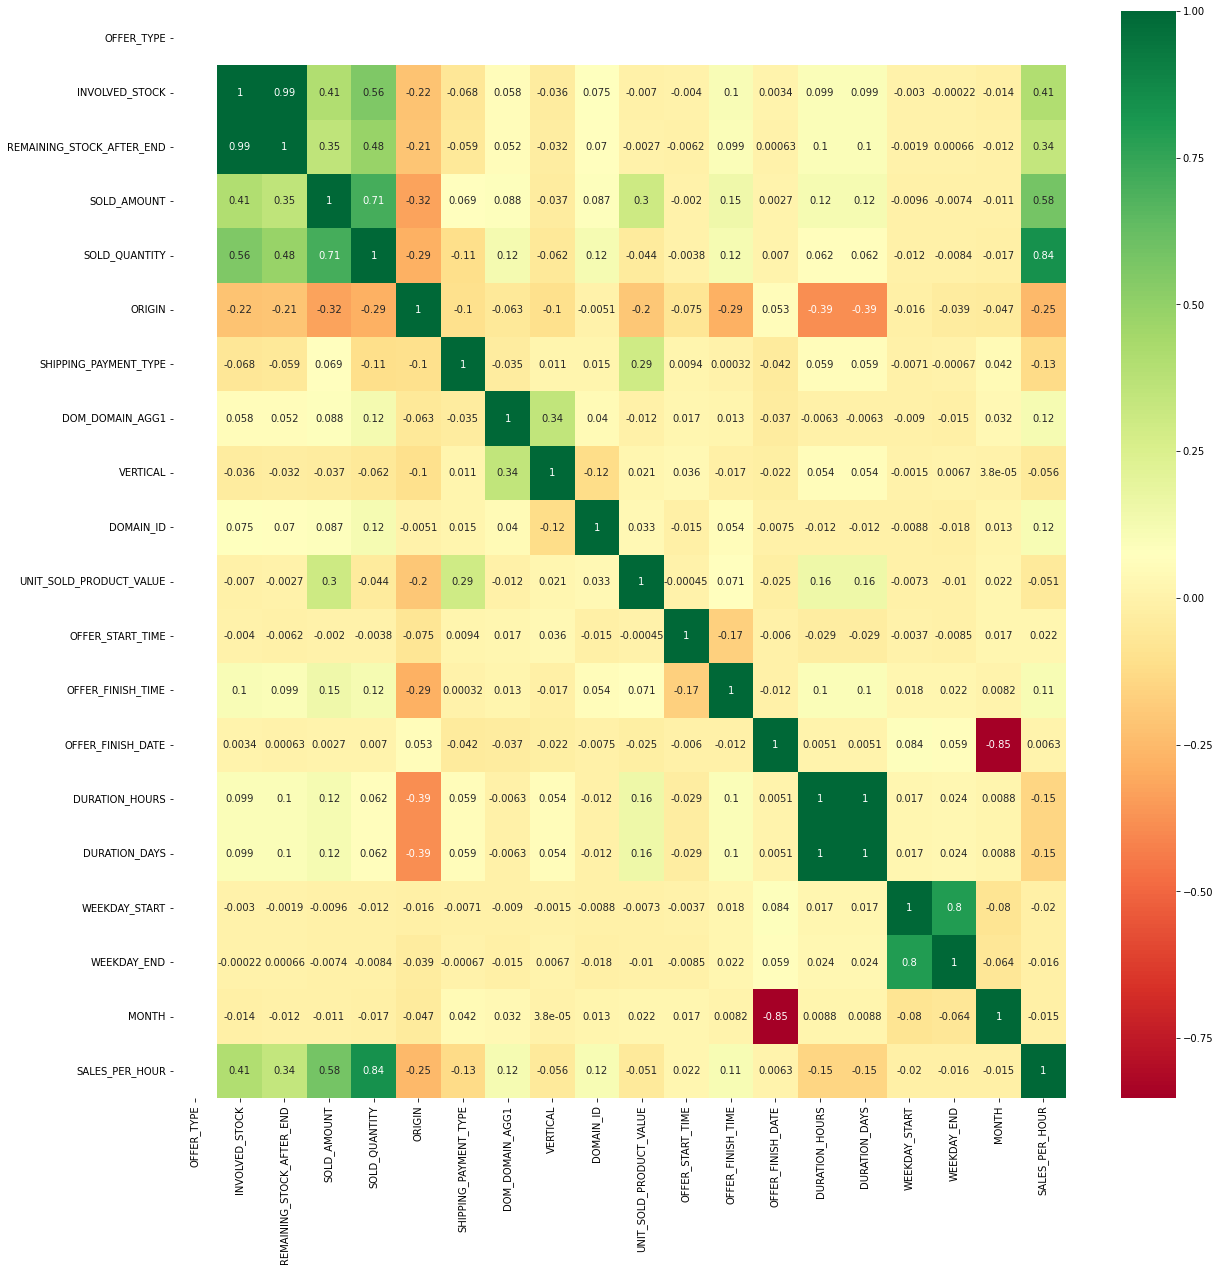

In [ ]:
# Plotando heatmap para visualizar correlações

corrmat = df_encoding.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_encoding[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Visualizando valores comparados com SOLD_AMOUNT
print(df_encoding.corr('pearson')[['SOLD_AMOUNT']].sort_values(by='SOLD_AMOUNT', ascending=False))
print(df_encoding.corr('pearson')[['SALES_PER_HOUR']].sort_values(by='SALES_PER_HOUR', ascending=False))

                           SOLD_AMOUNT
SOLD_AMOUNT                   1.000000
SOLD_QUANTITY                 0.708884
SALES_PER_HOUR                0.580864
INVOLVED_STOCK                0.405859
REMAINING_STOCK_AFTER_END     0.354320
UNIT_SOLD_PRODUCT_VALUE       0.304958
OFFER_FINISH_TIME             0.147519
DURATION_HOURS                0.120777
DURATION_DAYS                 0.120777
DOM_DOMAIN_AGG1               0.087935
DOMAIN_ID                     0.087364
SHIPPING_PAYMENT_TYPE         0.068626
OFFER_FINISH_DATE             0.002658
OFFER_START_TIME             -0.001968
WEEKDAY_END                  -0.007402
WEEKDAY_START                -0.009637
MONTH                        -0.010562
VERTICAL                     -0.037148
ORIGIN                       -0.324832
OFFER_TYPE                         NaN
                           SALES_PER_HOUR
SALES_PER_HOUR                   1.000000
SOLD_QUANTITY                    0.838130
SOLD_AMOUNT                      0.580864
INVOLVED_STOC

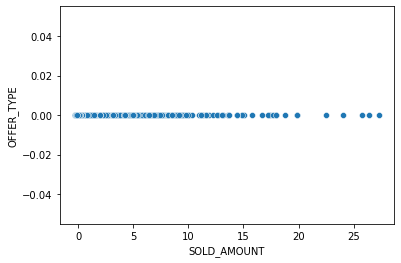

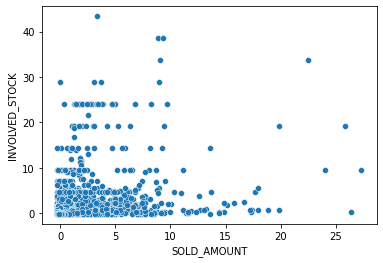

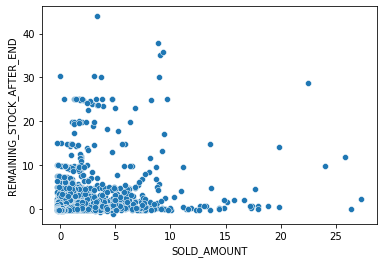

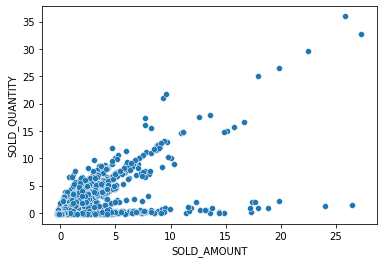

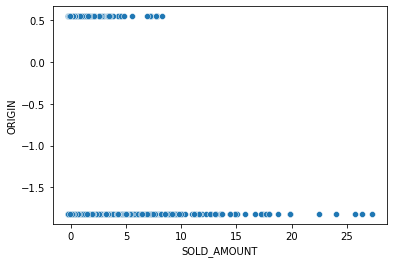

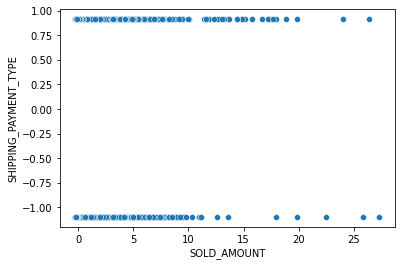

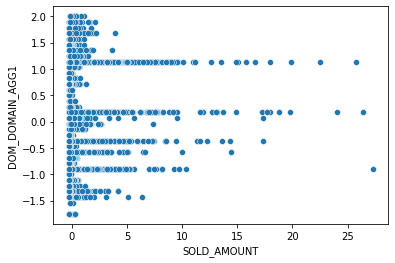

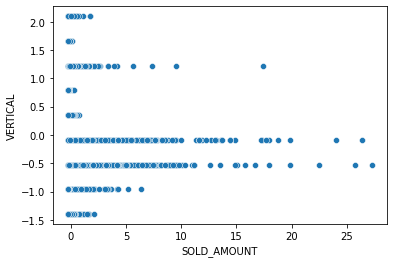

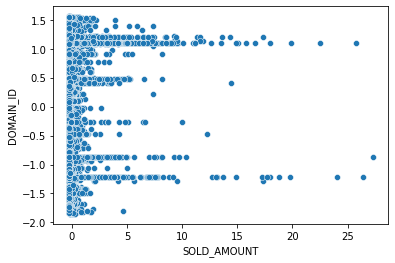

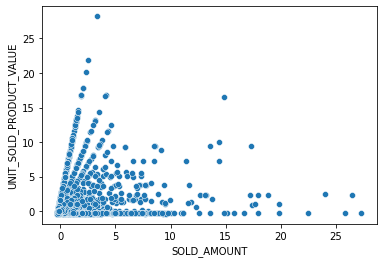

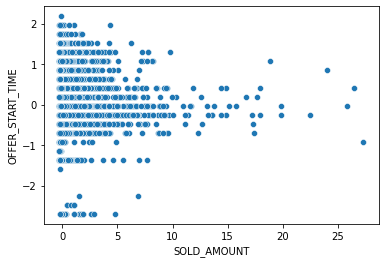

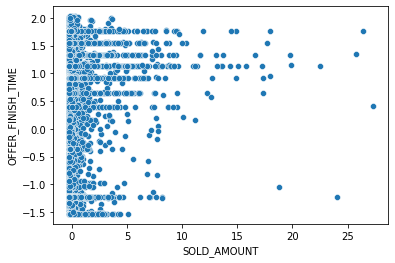

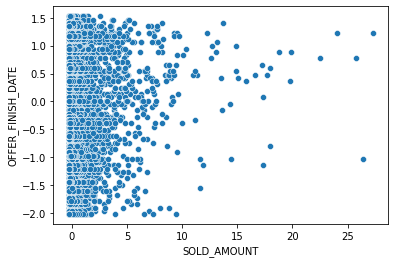

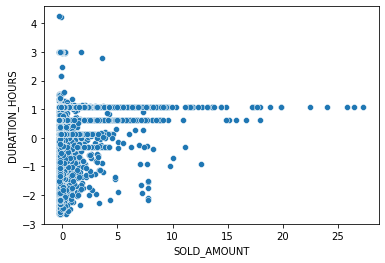

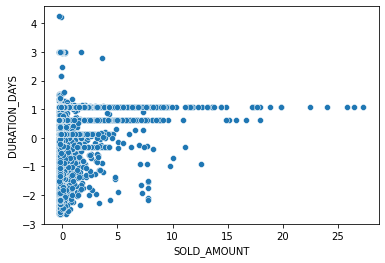

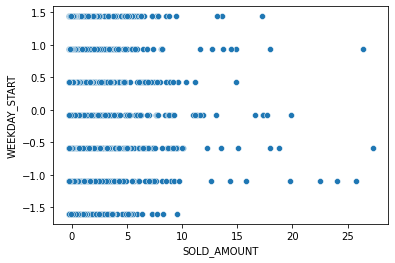

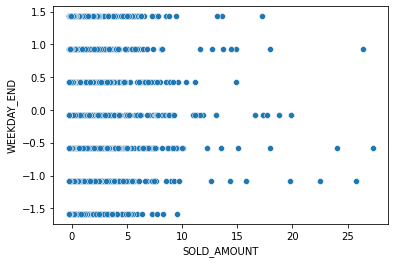

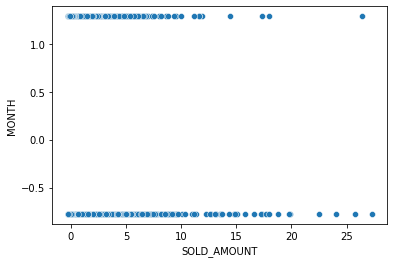

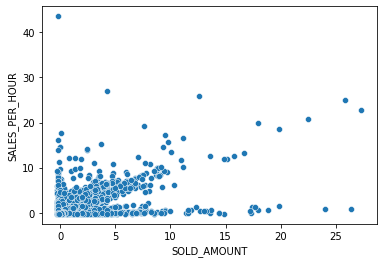

In [ ]:
for i in df_encoding.select_dtypes(include=['float', 'int']):
  if i == 'SOLD_AMOUNT':
    continue
  sns.scatterplot(data=df_encoding, x="SOLD_AMOUNT", y=i)
  plt.show()

**Considerações:** Tirando as features mais 'óbvias' como quantidade de vendas, receita e estoque envolvido, a feature que tem maior correlação com SOLD_AMOUNT é a UNIT_SOLD_PRODUCT_VALUE. Quanto menor o valor unitário, maior a quantidade de vendas por hora e potencial de geração de receita.

Outra possível correlação é entre SALES_PER_HOUR com SOLD_AMOUNT.

## Considerações finais

Quase metade dos produtos não foram vendidos, o ideal seria colocar mais itens do dom_domain_agg1 que mais vendem:
- Home&Decor
- Cleaning
- Footwear
- Batteries

Não oferecer produtos agro pois nenhum deles foi vendido.

Não vender os domains_id de: 
- thermal_cups
- disposable_gloves
- toys_and_games
- kitchen_paper_towels
- nasal_cpap_masks
- Headphones
- Shirts

Pois eles costumam ter estoque negativo e podem gerar problemas para os vendedores e para o MELI.

Oferecer mais itens do domain_id:
- camera_straps
- card_payment_terminals
- surgical_and_industrial_masks

Pois eles possuem mais vendas por hora.

Tudo isso pensando na otimização da disposição dos produtos no site, quanto mais produtos que realmente vendem forem exibidos, maior a geração de receita pois itens que não vendem ocupam espaço na visualização da página.

## Final

Conseguimos extrair muitos insights sobre dias, horários, categorias e sub-categorias, frete e etc. 

Se tivermos mais informações como visitas/cliques, cliques para adicionar ao carrinho, cliques para comprar agora e o acompanhamento do fechamento, podemos descobrir ainda mais informações sobre quais tipos de produtos as pessoas desistem no meio do caminho, tem mais interesse e gerar ainda mais valor para as ações estratégicas do MELI.

Também, poderíamos analisar o lucro bruto, taxas e métricas financeiras para identificar lucratividade do vendedor e do MELI e oferecer determinados tipos de produtos que não gerem 'dor de cabeça' pois venderam além do estoque, que vendam (pois mais de 50% dos produtos não tiveram vendas) e vendam mais rápido.

## Obrigado.